In [1]:
import os

basepath = "../../tmp/processed/attendance/6504c0a30267c540afff568a/0/"
files = []

for file in os.listdir(basepath):
    files.append(basepath + file)

print(files)

['../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_0159.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_0198.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_0402.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_0628.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_0806.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_0947.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_1529.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_1840.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_2170.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_2347.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_2432.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_2491.png', '../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
BLACK_THRESHOLD = 0.01


def isAbsent(file_path: str) -> bool:
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (50, 50))

    # remove 15px from each side but keeping the same center
    img = img[15:35, 15:35]

    img = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)  # type: ignore
    img = cv2.adaptiveThreshold(
        img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )

    # calculate black pixel percentage
    black = np.count_nonzero(img == 0)
    white = np.count_nonzero(img == 255)
    total = black + white
    black_percentage = black / total

    return black_percentage < BLACK_THRESHOLD

../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_2432.png
../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_3448.png
../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_3994.png
../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_4827.png
../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_5578.png
../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_5784.png
../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_6727.png
../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_6736.png


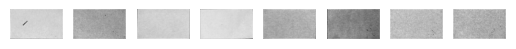

In [4]:
absent_files = []

for file in files:
    ab = isAbsent(file)
    if ab:
        print(file)
        absent_files.append(file)


f, axarr = plt.subplots(1, len(absent_files))
for i, file in enumerate(absent_files):
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    axarr[i].imshow(img, cmap="gray")
    axarr[i].axis("off")

plt.show()

In [5]:
def isAbsentDemo(file_path: str):
    f, ax = plt.subplots(1, 4)

    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    resized_img = cv2.resize(img, (50, 50))
    ax[0].imshow(resized_img, cmap="gray")
    ax[0].axis("off")
    ax[0].set_title("Resized")

    # remove 15px from each side but keeping the same center
    cropped_img = resized_img[15:35, 15:35]
    ax[1].imshow(cropped_img, cmap="gray")
    ax[1].axis("off")
    ax[1].set_title("Cropped")

    denoised_img = cv2.fastNlMeansDenoising(cropped_img, None, 10, 7, 21)  # type: ignore
    ax[2].imshow(denoised_img, cmap="gray")
    ax[2].axis("off")
    ax[2].set_title("Denoised")

    threshold_img = cv2.adaptiveThreshold(
        denoised_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )
    ax[3].imshow(threshold_img, cmap="gray")
    ax[3].axis("off")
    ax[3].set_title("Threshold")

    # calculate black pixel percentage
    black = np.count_nonzero(threshold_img == 0)
    white = np.count_nonzero(threshold_img == 255)
    total = black + white
    black_percentage = black / total

    print(f"Black percentage: {black_percentage}")
    print(f"Is absent: {black_percentage < BLACK_THRESHOLD}")

Black percentage: 0.0075
Is absent: True


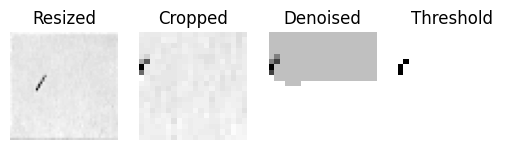

In [8]:
isAbsentDemo(
    "../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_2432.png"
)

Black percentage: 0.245
Is absent: False


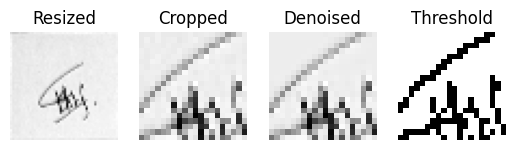

In [7]:
isAbsentDemo(
    "../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_0159.png"
)

Black percentage: 0.12
Is absent: False


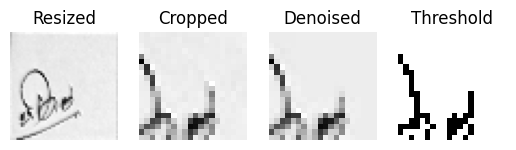

In [9]:
isAbsentDemo(
    "../../tmp/processed/attendance/6504c0a30267c540afff568a/0/eg_2018_3460.png"
)

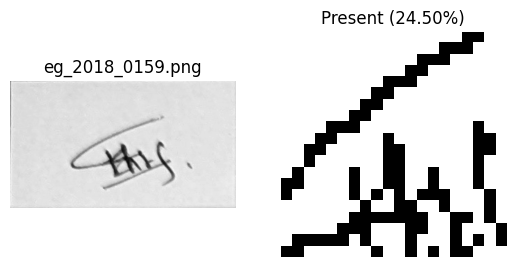

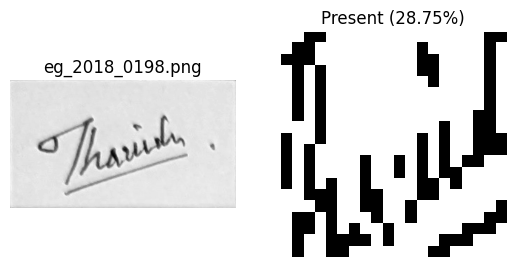

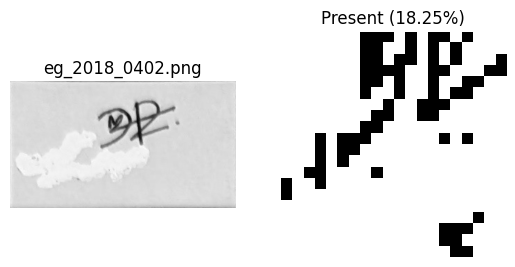

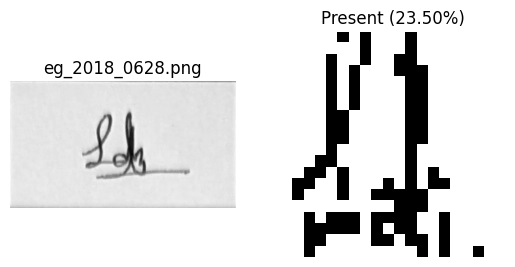

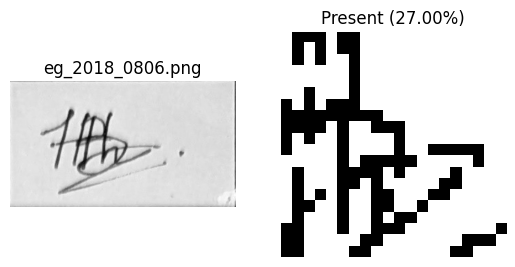

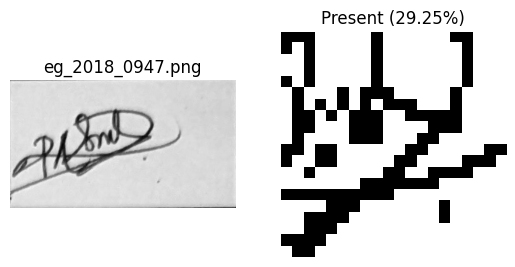

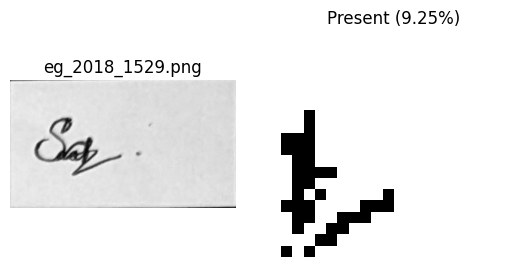

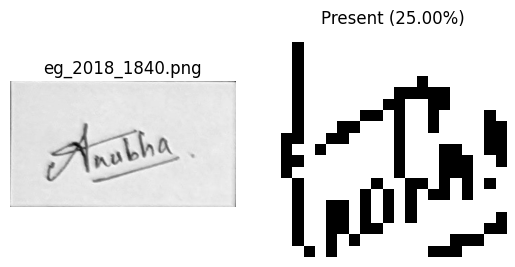

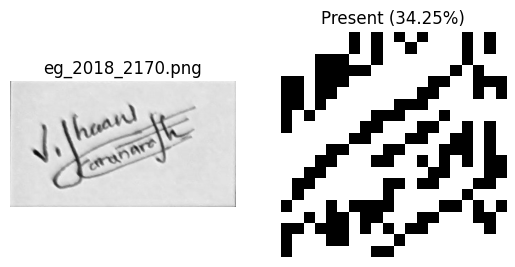

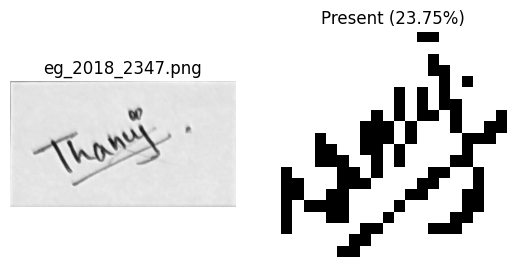

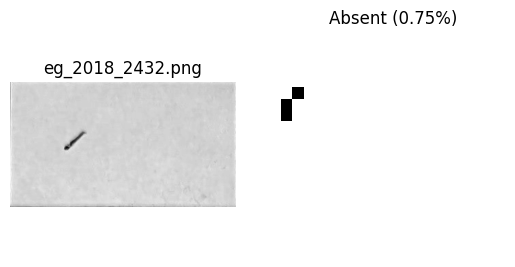

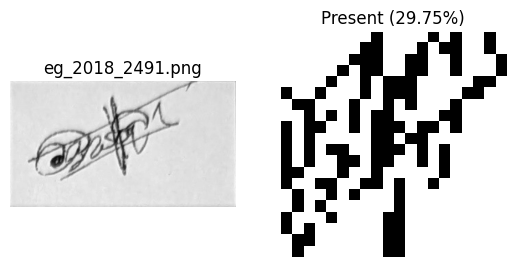

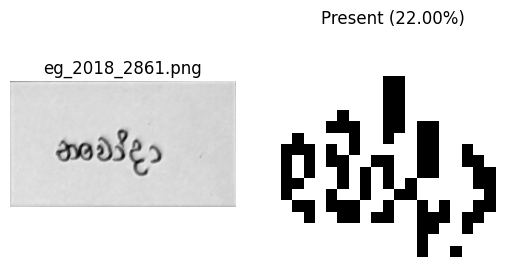

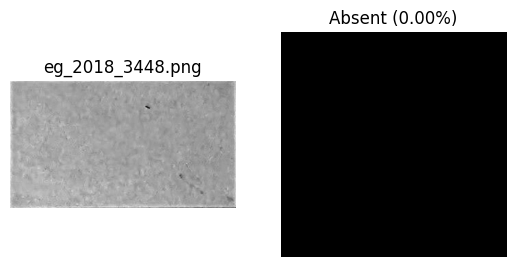

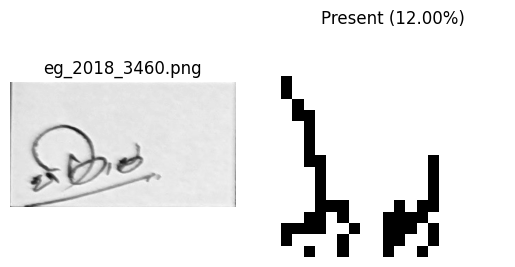

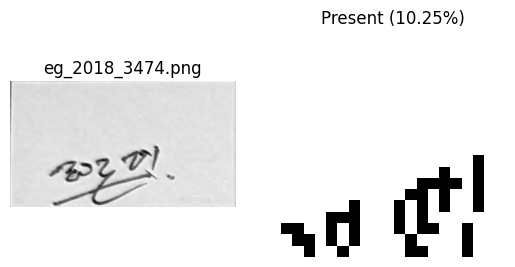

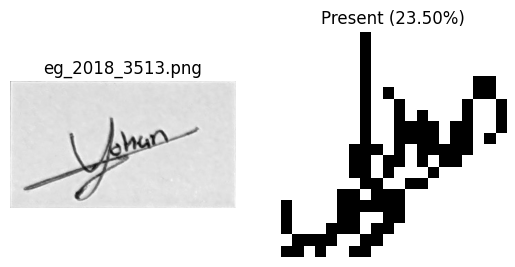

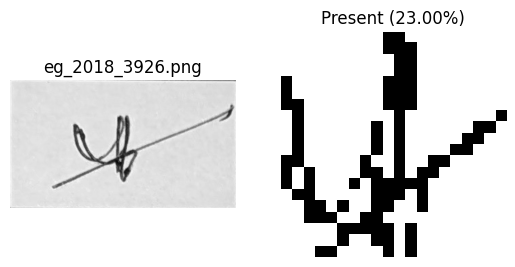

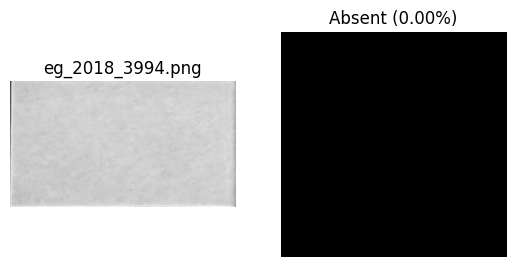

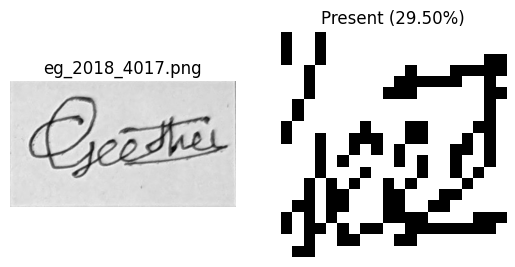

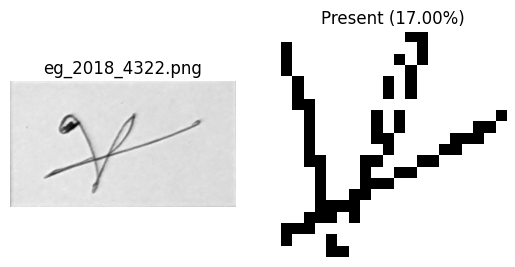

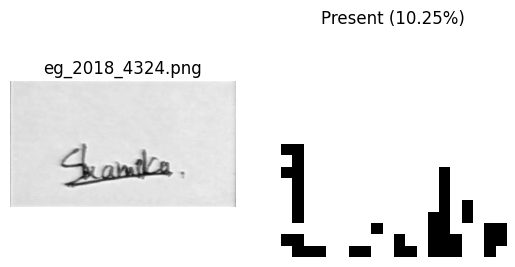

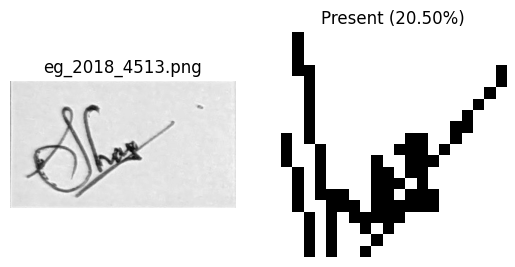

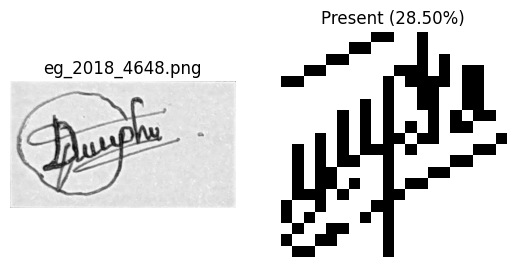

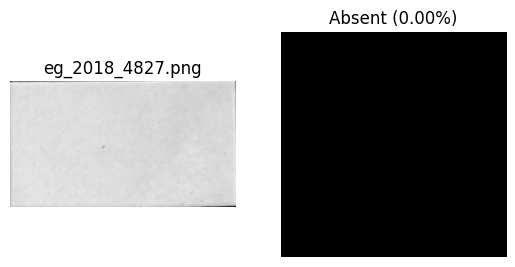

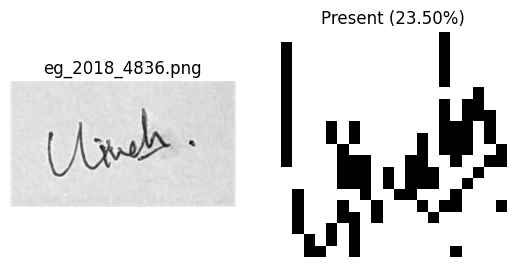

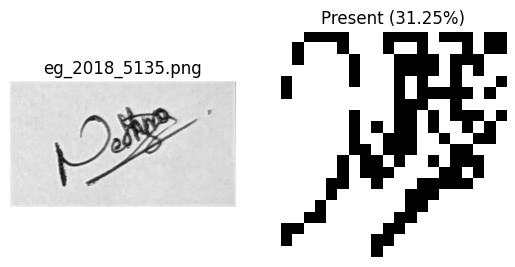

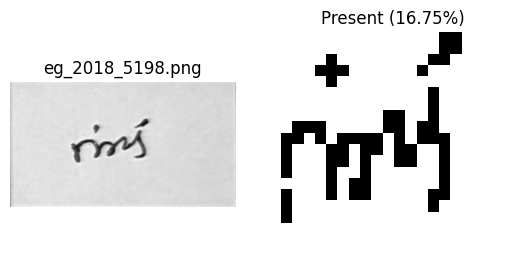

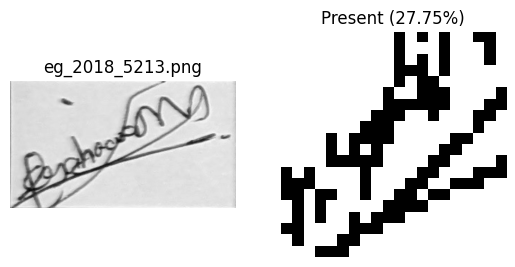

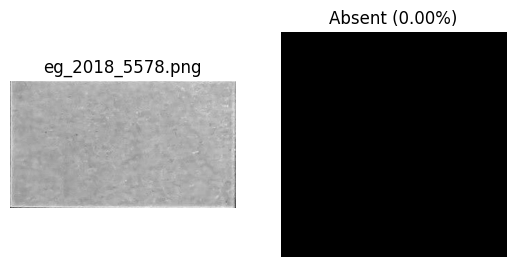

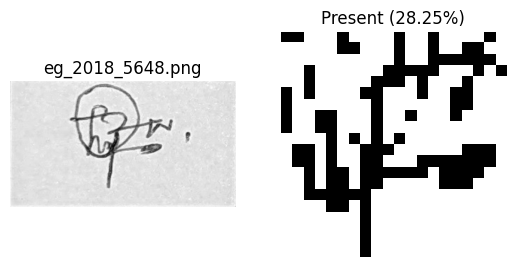

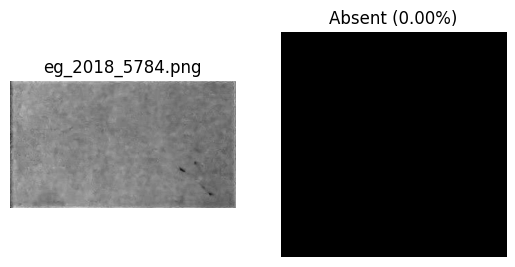

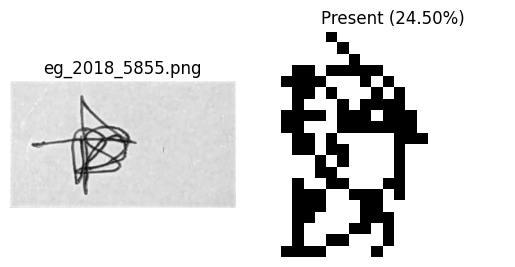

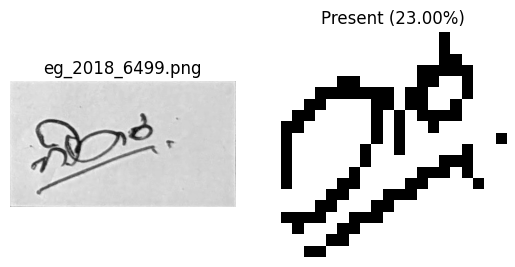

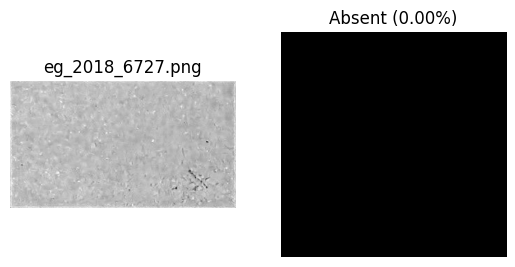

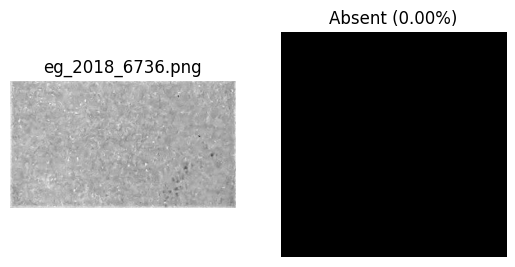

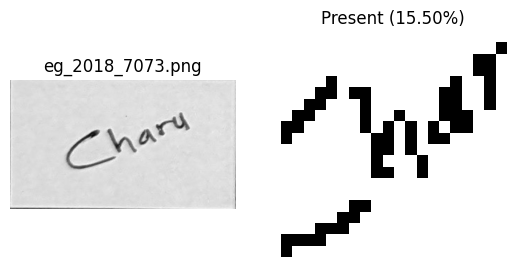

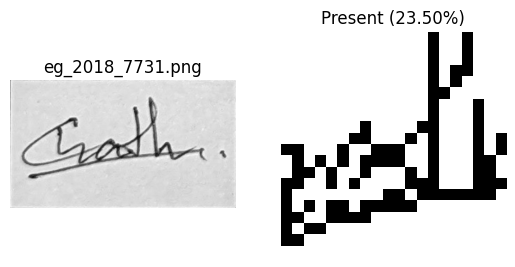

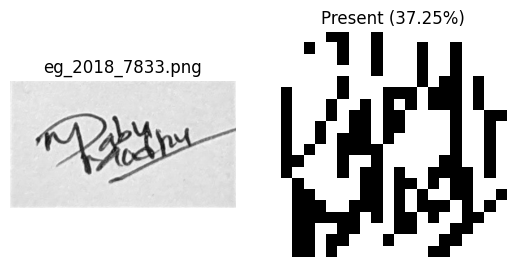

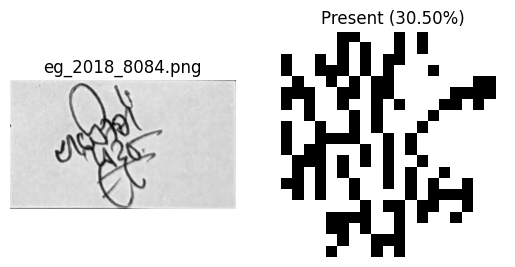

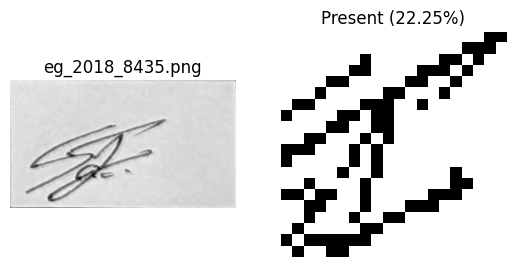

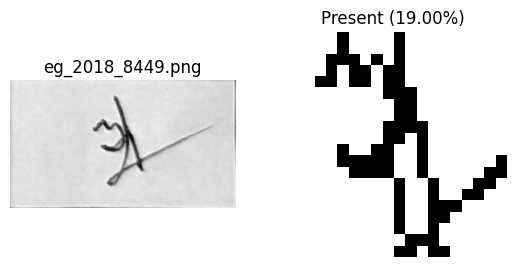

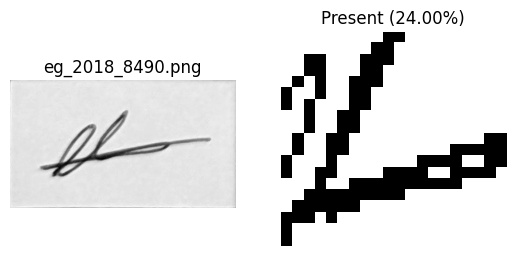

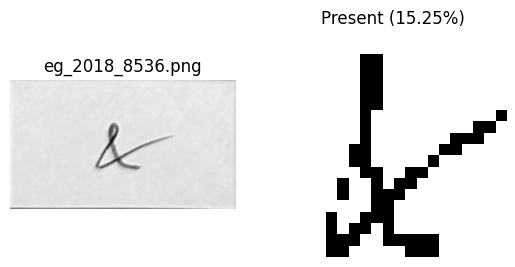

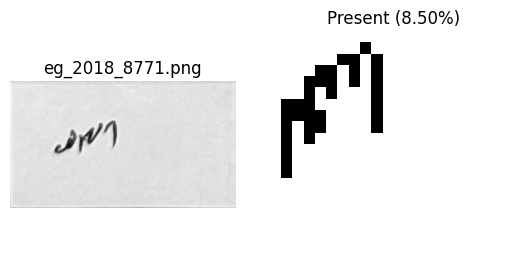

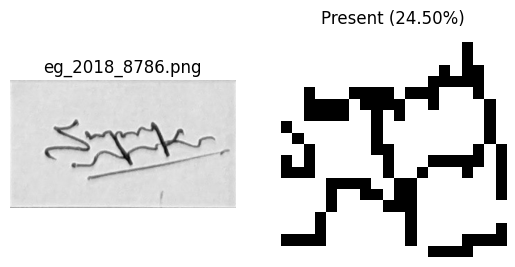

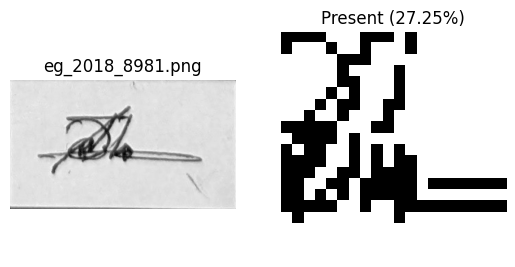

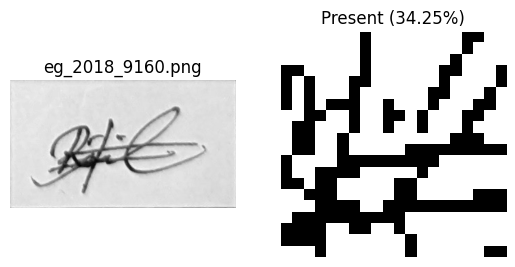

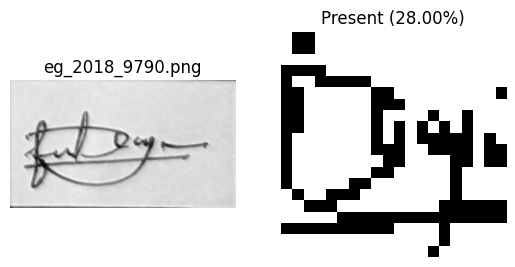

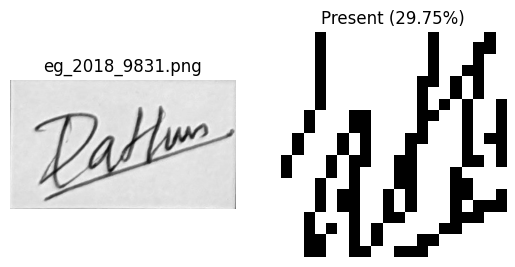

In [17]:
def absent_return(file_path: str):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (50, 50))

    # remove 15px from each side but keeping the same center
    img = img[15:35, 15:35]

    img = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)  # type: ignore
    img = cv2.adaptiveThreshold(
        img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
    )

    black = np.count_nonzero(img == 0)
    white = np.count_nonzero(img == 255)
    total = black + white
    black_percentage = black / total

    return (img, black_percentage)


def generate_sheet():
    for idx, file in enumerate(files):
        original = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        img, black = absent_return(file)

        f, axarr = plt.subplots(1, 2)
        f.set_figheight(10)

        axarr[0].imshow(original, cmap="gray")
        axarr[0].axis("off")
        axarr[0].set_title(file.split("/")[-1])

        axarr[1].imshow(img, cmap="gray")
        axarr[1].axis("off")
        axarr[1].set_title(
            ("Absent" if black < BLACK_THRESHOLD else "Present")
            + f" ({(black * 100):.2f}%)"
        )

        plt.show()


generate_sheet()